# Carga y organización de datos para detección de puntos de cambio
Este notebook contiene funciones y ejemplos para cargar las series de tiempo y los puntos de cambio (changepoints) desde los archivos del proyecto. Aquí se documenta y organiza el proceso de carga para facilitar el análisis y la experimentación con los algoritmos de detección online.

Intrucciones para Allan:

1- Implementar con los datasets sinteticos la deteccion de puntos de cambio con algoritmos online y no supervisados

2- Dividir las series de tiempo de los datasets en dos grupos training and testing. Los de training serán para calibrar los parámetros de los algoritmos, con el fin de determinar el mejor parámetro. Los de testing es para evaluar con el parametro encontrado cual es el performance del modelo. Esto es necesario porque si lo hacemos todo con las mismas series puede que sobreajustemos parametros.  

3-Crear las funciones para evaluar el rendimiento de los algoritmos detectando puntos de cambios. Hay varias métricas posibles. Vamos trabajar con estas dos inicialmente

✅ 1. Mean Time to Detection (MTTD)
Promedio de tiempo entre el punto de cambio real y el momento en que el modelo lo detecta:
MTTD = promedio(|punto_detectado - punto_real|), solo para TP
Útil especialmente en detección online, donde el tiempo de reacción importa.


✅ 2. F1 score con tolerancia


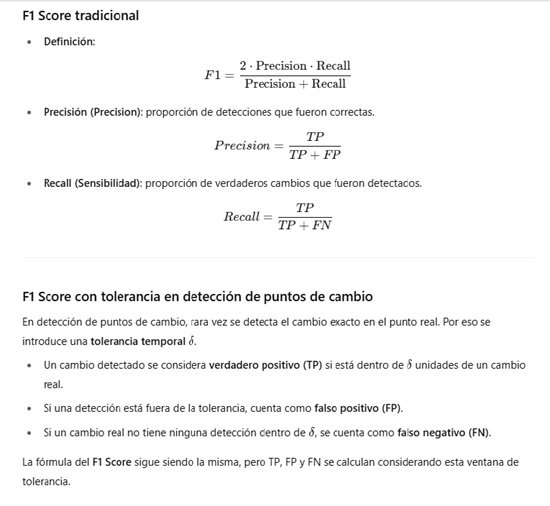

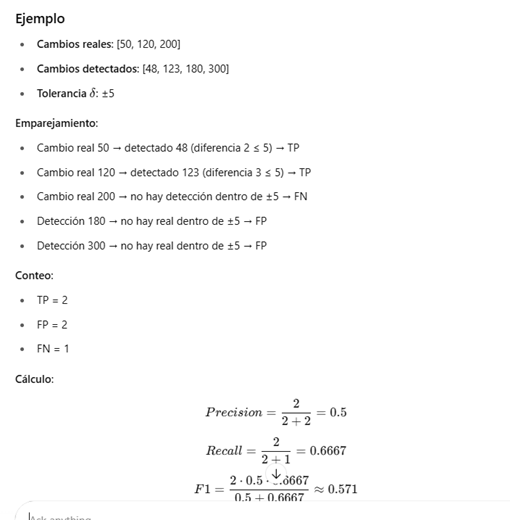


Significado
Un F1 Score de 0.571 indica que, considerando una tolerancia de ±5, el sistema detecta un número moderado de cambios correctos, pero aún tiene bastantes falsos positivos y algunos falsos negativos.

4-Crear una rejilla de experimentacion con diferentes combinaciones de parametros para cada algoritmos con el fin de determinar cual parametro da el mejor resultado. Podemos usar  el Mean Time to Detection para determinar cual es el mejor parametros 

5- Una vez que hayamos determinado cual parametro es el ideal los salvamos y aplicamos el algorimos a los datos de testing. Vamos a guardar en un pandas dataframe el nombre del algorimos, el id de la serie de tiempo que estamos aplicando, el grado de ruido que posee la serie de tiempo, y  el resultado de las dos metricas. Es importante guardar en un diccionario los parametros utilizados para el algoritmo


5-Por ahora vamos a crear todo el pipeline con dos algoritmos CUMSUM y EWMA. Cuando tengamos todo el pipeline empezamos a implementar  funciones con otros algoritmos online. Luego tengo una idea de mejoras que podemos hacer a los algorimos pero por ahora vamos a crear un baseline de comparacion 


Me interesa que te quede muy claro la diferencia entre online y offline por eso quiero que veas el titutlo ONLINE CUMSUM. NO quiero que uses ese CUMSUM sino alguno ya implementado en alguna libreria de python. Pero este te lo pongo para que veas lo que hace el online. Mira que en online se va probando dato por dato para ver si es punto de cambio en vez de que el algoritmo analice toda la serie completa e indique donde hay puntos de cambio. Cuando se le da toda la serie para que los detecte es offline. Sin embargo la mayor utilidad practica para deteccion de delitos sera online porque queremos saber en tiempo real si ha ocurrido un punto de cambio, en vez de que nos diga a partir de un historico donde estan los puntos de cambio. Esa es la razon por la que vamos punto por punto, simulando el streaming de datos conforme van ocurriendo.



# ONLINE CUMSUM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate data: first half mean=0, second half mean=3
np.random.seed(42)
data = np.concatenate([np.random.normal(0, 1, 100),
                       np.random.normal(3, 1, 100)])

In [2]:
def online_cusum(data, threshold=5, drift=0.01):
    """Simple online CUSUM algorithm."""
    g_pos = 0
    g_neg = 0
    changes = []

    mean_estimate = np.mean(data[:20])  # initial estimate

    for i, x in enumerate(data):
        s = x - mean_estimate - drift
        g_pos = max(0, g_pos + s)
        g_neg = min(0, g_neg + s)

        if g_pos > threshold or abs(g_neg) > threshold:
            changes.append(i)
            g_pos = 0
            g_neg = 0
            mean_estimate = np.mean(data[max(0, i-20):i+1])  # re-estimate mean

    return changes

In [ ]:
change_points = online_cusum(data, threshold=15, drift=0.10)

plt.figure(figsize=(10, 4))
plt.plot(data, label='Data')
plt.axvline(x=100, color='gray', linestyle='--', label='True Change')
for cp in change_points:
    plt.axvline(x=cp, color='red', linestyle='--', label='Detected Change' if cp == change_points[0] else "")
plt.legend()
plt.title("Online Change Point Detection with CUSUM")
plt.show()